In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# These two imports are specifically for the robust algorithm of the quadratic formula
import math
import decimal as dec

dec.getcontext().prec = 50  # Set decimal precision to 50 places

The minimum error is: 4.3610515199077327e-10 occurring at h = 1e-08


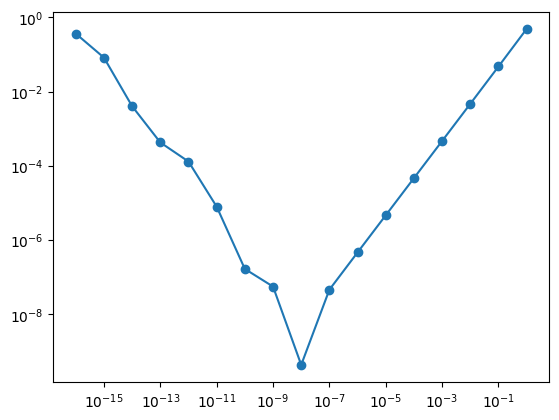

In [3]:
# Our goal is to compute a numerical approximation for the derivative of a function
# using the forward difference formula:
# f'(x) ≈ (f(x + h) - f(x)) / h

def f(x):
    return np.sin(x)

def forward_difference(f, x, h):
    approx_derivative = (f(x + h) - f(x)) / h
    return approx_derivative

exact_value = np.cos(1.2)

# We now plot the error of the approximation of the derivative against the exact derivative (cos(x))
log_scale_x = [10**-k for k in range(0,17)]
abs_error = [np.abs(forward_difference(f, 1.2, h) - exact_value) for h in log_scale_x]

plt.figure()
plt.loglog(log_scale_x, abs_error, marker = 'o', label='Termwise Error')

print('The minimum error is:', np.min(abs_error), 'occurring at h =', log_scale_x[np.argmin(abs_error)])

The minimum error is: 2.4329982473147993e-12 occurring at h = 1e-05
The minimum error is: 6.217725880164338e-06 occurring at h = 0.01


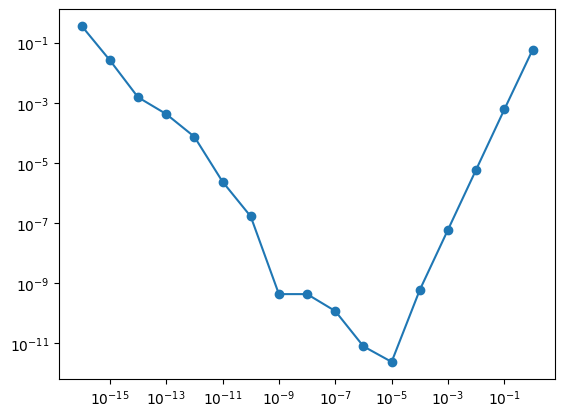

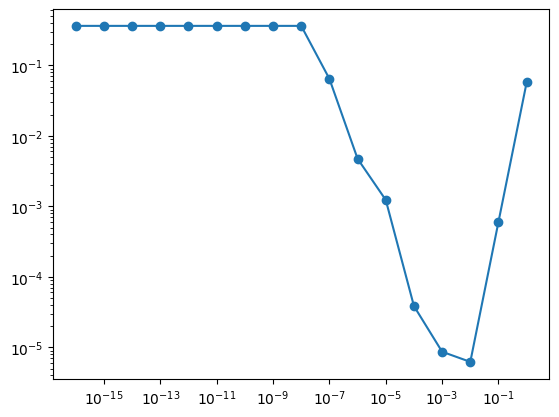

In [4]:
# Now our goal is to use the use the centered finite difference formula:
# f'(x) ≈ (f(x + h) - f(x - h)) / (2h)

# First, the double-precision case
def centered_difference_dp(f, x, h):
    approx_derivative = (f(x + h) - f(x - h)) / (2 * h)
    return approx_derivative

# Now, the single-precision case
def centered_difference_sp(f, x, h):
    x_sp = np.float32(x)
    h_sp = np.float32(h)
    f_x_plus_h = np.float32(f(x_sp + h_sp))
    f_x_minus_h = np.float32(f(x_sp - h_sp))
    approx_derivative = (f_x_plus_h - f_x_minus_h) / (2 * h_sp)
    return approx_derivative

# Necessary repetitions for plotting
abs_error_dp = [np.abs(centered_difference_dp(f, 1.2, h) - exact_value) for h in log_scale_x]

plt.figure()
plt.loglog(log_scale_x, abs_error_dp, marker = 'o')

print('The minimum error is:', np.min(abs_error_dp), 'occurring at h =', log_scale_x[np.argmin(abs_error_dp)])


# Single precision case
abs_error_sp = [np.abs(centered_difference_sp(f, 1.2, h) - exact_value) for h in log_scale_x]

plt.figure()
plt.loglog(log_scale_x, abs_error_sp, marker = 'o', label='Termwise Error')

print('The minimum error is:', np.min(abs_error_sp), 'occurring at h =', log_scale_x[np.argmin(abs_error_sp)])

In [13]:
# Now, we would like to use the quadratic formula to compute the roots of a quadratic polynomial:

def quadratic_formula(a, b, c):
    try:
        root1 = float((-b + np.sqrt(b**2 - 4*a*c)) / (2*a))
        root2 = float((-b - np.sqrt(b**2 - 4*a*c)) / (2*a))
        roots = [root1, root2]
    except:
        roots = ['Error', 'Error']
    return roots

approx_solns = []
coef_list = [(1, 4, 3), 
             (1e200, 4e200, 3e200), 
             (0, 2, 8), 
             (1, 1e8, 1), 
             (1, -8, 15.9999999), 
             (1e-200, -1e200, 1e-200)]

for (a, b, c) in coef_list:
    approx_solns.append(quadratic_formula(a, b, c))

print('The approximate solutions are:', approx_solns)

The approximate solutions are: [[-1.0, -3.0], ['Error', 'Error'], [nan, -inf], [-7.450580596923828e-09, -100000000.0], [4.0003162277650555, 3.999683772234944], ['Error', 'Error']]


C:\Users\erich\AppData\Local\Temp\ipykernel_13916\672253940.py:5: RuntimeWarning: invalid value encountered in scalar divide
  root1 = float((-b + np.sqrt(b**2 - 4*a*c)) / (2*a))
C:\Users\erich\AppData\Local\Temp\ipykernel_13916\672253940.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  root2 = float((-b - np.sqrt(b**2 - 4*a*c)) / (2*a))


In [37]:
# Now, we would like to use a more stable version of the quadratic formula to compute the roots of a quadratic polynomial:
def stable_quadratic_formula(a, b, c):
    # This first part addresses the case where a = 0
    if a == 0:
        if b != 0:
            root = float(-c / b)
            return [root, 'N/A']
        else:
            return ['Error', 'Error']
        
    # This second part of the functions makes the polynomial monic to avoid overflow/underflow
    a_d = dec.Decimal(a)/dec.Decimal(a)
    b_d = dec.Decimal(b)/dec.Decimal(a)
    c_d = dec.Decimal(c)/dec.Decimal(a)

    # This third part of the function ensures stability and avoids catastrophic cancellation
    disc = (b_d**2 - 4*a_d*c_d).sqrt()
    if b >= 0:
        root1 = (2*c_d) / (-b_d - disc)
        root2 = (-b_d - disc) / (2*a_d)
        roots = [root1, root2]
    else:
        root1 = (2*c_d) / (-b_d + disc)
        root2 = (-b_d + disc) / (2*a_d)
        roots = [root1, root2]
    return roots

approx_solns_stable = []
for (a, b, c) in coef_list:
    approx_solns_stable.append(stable_quadratic_formula(a, b, c))

print('The approximate solutions using the stable formula are:', approx_solns_stable)

The approximate solutions using the stable formula are: [[Decimal('-1'), Decimal('-3')], [Decimal('-1'), Decimal('-3')], [-4.0, 'N/A'], [Decimal('-1.0000000000000001000000000000000200000000000000050E-8'), Decimal('-99999999.99999998999999999999999899999999999999980')], [Decimal('3.9996837722349440946023435677529262821019566100872'), Decimal('4.0003162277650559053976564322470737178980433899128')], [Decimal('1.0000000000000000123671401865723983108946291215733E-400'), Decimal('9.9999999999999998763285981342760184205152727276065E+399')]]
